Code for Merging Respiratory and Behavioral Data

Overview

This script integrates respiratory recordings with behavioral event data to analyze respiratory dynamics during specific behavioral bouts. It processes raw data, synchronizes it with behavioral events, and performs analyses.

Workflow Explanation
1. Import Libraries
Essential libraries used in the script:

tdt: Reads and processes TDT system data.

neurokit2: Cleans and extracts features from respiratory signals.

numpy and pandas: Handle numerical computations and structured tabular data.

matplotlib: Visualizes respiratory data alongside behavioral events.

2. Load Respiratory Data
Purpose: Extract and prepare the respiratory signal for analysis.

Steps:

Load respiratory signal data from the TDT block.

Extract the signal and its sampling rate.

Generate a time vector for synchronization and plotting.

3. Process Respiratory Signal
Purpose: Preprocess the respiratory signal for analysis.

Key Functions:

nk.rsp_clean: Cleans the raw respiratory signal to remove noise.

nk.rsp_rate: Calculates respiratory rate (breaths per minute).

signal_filter: Smooths the respiratory rate for improved clarity.

Outcome: A DataFrame containing time, respiratory rate, and cleaned signal.

4. Extract Behavioral Bouts
Purpose: Identify and extract periods of specific behavioral activities.

How It Works:

A function identifies behavioral bouts based on input parameters:

Subject: Specifies which subject(s) to analyze.

Behavior: Defines target behaviors (e.g., running, grooming).

Filters:

min_iti: Minimum time between bouts.

min_bout: Minimum bout duration.

Filters out irrelevant or short bouts.

Example Use: Demonstrates the extraction of "running" bouts for a specific subject.

5. Align Respiratory and Behavioral Data
Purpose: Synchronize respiratory signals with behavioral bouts.

Steps:

Flag respiratory data points that occur during behavioral bouts.

Split the data into two groups:

In-bout data: Data points during behavioral events.

Out-of-bout data: Data points outside behavioral events.

6. Analyze and Compare Data
Purpose: Compare respiratory dynamics during and outside of behavioral bouts.

Analysis:

Calculate the average respiratory rate for in-bout and out-of-bout data.

Quantify differences in respiratory behavior across contexts.

7. Visualize Results
Purpose: Present respiratory data and behavioral events visually.

Visualization Details:

Plot the respiratory signal over time.

Highlight behavioral bouts as shaded regions.

Add labels, titles, and legends for clarity.

8. Export Data
Purpose: Save processed data for further analysis or sharing.

Output: Exports a CSV file containing the merged respiratory and behavioral data.

Flexibility:

Handles multiple subjects, behaviors, and experimental conditions by adjusting parameters.

Extensions:

Analyze amplitude or phase of the respiratory signal.

Compare respiratory dynamics across different behaviors or environments.

Visualization:

Highlighting behavioral bouts enhances interpretability.

Provides insights into the interaction between respiration and behavior over time.

In [300]:
# Import and verify library versions
import tdt
import neurokit2 as nk
from neurokit2 import signal_filter
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.fft import fft, fftfreq
import sys

# Add the full path to the breathmetrics_python-main folder
sys.path.insert(0, r"C:\Users\sjs93\OneDrive\Documents\GitHub\respiratory_pilot\breathmetrics_python-main")

from breathmetrics.breathmetricsClass import bmObject

print("TDT version:", tdt.__version__)
print("NeuroKit2 version:", nk.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.__version__)


TDT version: 0.6.6
NeuroKit2 version: 0.2.10
NumPy version: 1.26.4
Pandas version: 2.2.3
Matplotlib version: 3.10.0


In [301]:
# Specify the TDT file path
tdt_file_path = r"C:\Users\sjs93\OneDrive - University of Florida\resp_recordings\1_1_cm_1_2_hc_trial1"
# Load the TDT block
data = tdt.read_block(tdt_file_path)

# Print the data structure to explore it
print(data)


Found Synapse note file: C:\Users\sjs93\OneDrive - University of Florida\resp_recordings\1_1_cm_1_2_hc_trial1\Notes.txt
read from t=0s to t=319.23s
epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])


In [285]:
# Check the attributes of the 'Resp' stream
print(data.streams['Resp'])


name:	'Resp'
code:	1886610770
size:	18
type:	33025
type_str:	'streams'
ucf:	False
fs:	101.72525787353516
dform:	0
start_time:	0.0
data:	array([0.1385519 , 0.14007781, 0.1385519 , ..., 0.14618142, 0.14221407,
       0.14435034], dtype=float32)
channel:	[1]


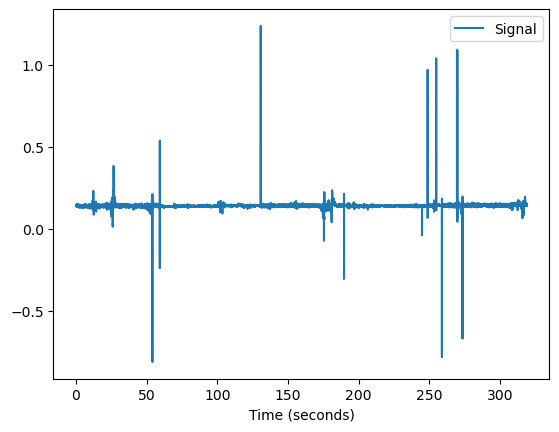

In [302]:
# Extract respiratory signal
rsp = data.streams['Resp'].data  # This is your respiratory data
srate = data.streams['Resp'].fs  # Sampling rate

# Use NeuroKit2 to plot the signal (we'll use the correct sampling rate)
nk.signal_plot(rsp, sampling_rate=srate)


In [287]:
# Verify the first few values of your signal and sampling rate
print("First few values of respiratory signal:", rsp[:10])  # First 10 samples
print("Sampling rate:", srate)


First few values of respiratory signal: [0.1385519  0.14007781 0.1385519  0.1385519  0.14557107 0.14282444
 0.1419089  0.1419089  0.14373998 0.14435034]
Sampling rate: 101.72525787353516


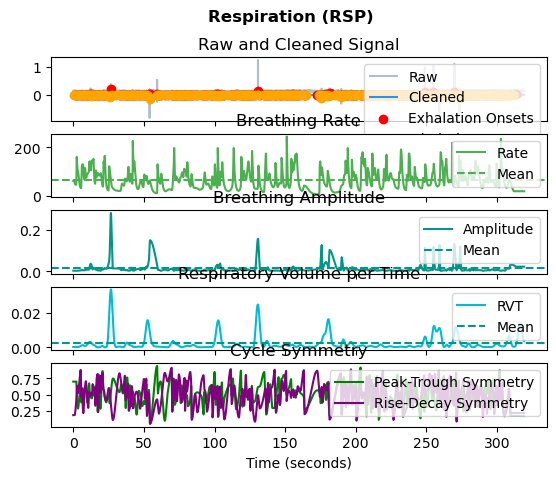

In [288]:
# Process the respiratory signal using NeuroKit2
rsp_signals, info = nk.rsp_process(rsp, sampling_rate=srate)

# Plot the processed subset
nk.rsp_plot(rsp_signals, info)

c:\Users\sjs93\anaconda3\envs\resp_env\lib\site-packages\neurokit2\rsp\rsp_symmetry.py:90: NeuroKitWarning: Not enough peaks and troughs (signal too short?) to compute symmetry, returning nan for symmetry.
  warn(


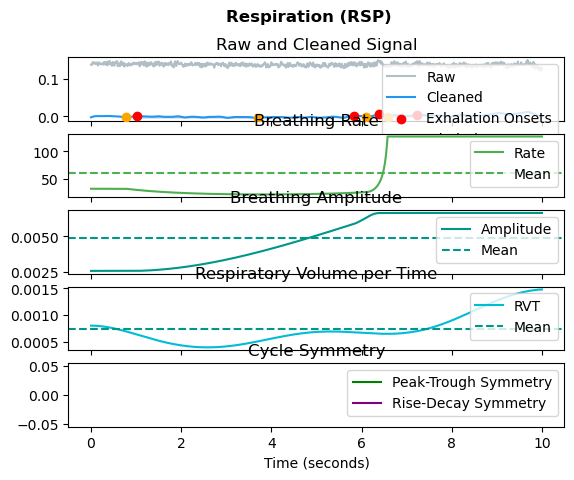

In [289]:
import neurokit2 as nk

# Assume `rsp` contains your full respiratory signal
srate = 100  # Sampling rate (samples/second)
duration = 10  # Time in seconds for the subset

# Extract the first 10 seconds of the signal
rsp_subset = rsp[:srate * duration]

# Process the subset using NeuroKit2
rsp_signals_subset, info_subset = nk.rsp_process(rsp_subset, sampling_rate=srate)

# Plot the processed subset
nk.rsp_plot(rsp_signals_subset, info_subset)


In [290]:
# Print the breathing rate column
print(rsp_signals['RSP_Rate'])

0        62.300452
1        62.300452
2        62.300452
3        62.300452
4        62.300452
           ...    
32467    19.752477
32468    19.752477
32469    19.752477
32470    19.752477
32471    19.752477
Name: RSP_Rate, Length: 32472, dtype: float64


In [291]:
rsp_signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_RVT,RSP_Phase,RSP_Phase_Completion,RSP_Symmetry_PeakTrough,RSP_Symmetry_RiseDecay,RSP_Peaks,RSP_Troughs
0,0.138552,-0.001548,0.002573,62.300452,0.000253,NaN,0.0,0.698630,0.183206,0,0
1,0.140078,-0.001120,0.002573,62.300452,0.000253,NaN,0.0,0.698630,0.183206,0,0
2,0.138552,-0.000693,0.002573,62.300452,0.000253,NaN,0.0,0.698630,0.183206,0,0
3,0.138552,-0.000280,0.002573,62.300452,0.000253,NaN,0.0,0.698630,0.183206,0,0
4,0.145571,0.000110,0.002573,62.300452,0.000254,NaN,0.0,0.698630,0.183206,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32467,0.147402,0.003044,0.021953,19.752477,0.003478,NaN,0.0,0.171233,0.216828,0,0
32468,0.143435,0.002818,0.021953,19.752477,0.003478,NaN,0.0,0.171233,0.216828,0,0
32469,0.146181,0.002581,0.021953,19.752477,0.003480,NaN,0.0,0.171233,0.216828,0,0
32470,0.142214,0.002339,0.021953,19.752477,0.003482,NaN,0.0,0.171233,0.216828,0,0


In [292]:
# Subset the data to a smaller time window
start_time = 30  # Start time in seconds
end_time = 138   # End time in seconds
start_index = int(start_time * srate)
end_index = int(end_time * srate)

subset = rsp_signals.iloc[start_index:end_index]
time_subset = np.linspace(start_time, end_time, len(subset))

# Calculate mean breathing rate
mean_rate = subset['RSP_Rate'].mean()

# Plot the subset signals
plt.figure(figsize=(12, 10))

# Raw Signal
plt.subplot(4, 1, 1)
plt.plot(time_subset, subset['RSP_Raw'], label='Raw Signal', color='blue')
plt.title('Raw Respiratory Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Clean Signal
plt.subplot(4, 1, 2)
plt.plot(time_subset, subset['RSP_Clean'], label='Clean Signal', color='green')
plt.title('Cleaned Respiratory Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Breathing Rate
plt.subplot(4, 1, 3)
plt.plot(time_subset, subset['RSP_Rate'], label='Breathing Rate (breaths/second)', color='orange')
plt.axhline(y=mean_rate, color='red', linestyle='--', label=f'Mean Rate = {mean_rate:.2f} breaths/s')
plt.title('')
plt.xlabel('Time (s)')
plt.ylabel('HZ')


# Breathing Amplitude
plt.subplot(4, 1, 4)
plt.plot(time_subset, subset['RSP_Amplitude'], label='Breathing Amplitude', color='purple')
plt.title('Breathing Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


TypeError: 'module' object is not callable

In [293]:
# Calculate mean, median, and standard deviation of breathing rate
mean_breathing_rate = rsp_signals['RSP_Rate'].mean()
std_breathing_rate = rsp_signals['RSP_Rate'].std()
median_breathing_rate = rsp_signals['RSP_Rate'].median()


mean_breathing_rate
# std_breathing_rate
# median_breathing_rate

65.38119600654554

In [294]:
# Find the times when the breathing rate exceeds a certain threshold (e.g., 50 breaths per minute)
threshold = 50
exceed_threshold = rsp_signals[rsp_signals['RSP_Rate'] > threshold]

print(exceed_threshold)


        RSP_Raw  RSP_Clean  RSP_Amplitude   RSP_Rate   RSP_RVT  RSP_Phase  \
0      0.138552  -0.001548       0.002573  62.300452  0.000253        NaN   
1      0.140078  -0.001120       0.002573  62.300452  0.000253        NaN   
2      0.138552  -0.000693       0.002573  62.300452  0.000253        NaN   
3      0.138552  -0.000280       0.002573  62.300452  0.000253        NaN   
4      0.145571   0.000110       0.002573  62.300452  0.000254        NaN   
...         ...        ...            ...        ...       ...        ...   
31521  0.145266   0.003000       0.031890  50.901903  0.003248        0.0   
31522  0.149538   0.003542       0.031889  50.691391  0.003214        0.0   
31523  0.144350   0.004099       0.031888  50.480727  0.003180        0.0   
31524  0.151369   0.004651       0.031887  50.269938  0.003145        0.0   
31525  0.150759   0.005182       0.031885  50.059048  0.003111        0.0   

       RSP_Phase_Completion  RSP_Symmetry_PeakTrough  RSP_Symmetry_RiseDeca

In [295]:
# Extract respiratory signal
rsp_signal = data.streams['Resp'].data  # Adjust 'Resp' to match your stream name
srate = data.streams['Resp'].fs
time_array = np.linspace(0, len(rsp_signal) / srate, len(rsp_signal))

In [233]:
# Clean respiratory signal
#rsp_cleaned = nk.rsp_clean(rsp_signal, sampling_rate=srate)

In [296]:
# Smooth the respiratory rate
rsp_cleaned_filter = nk.signal_filter(
    rsp_cleaned, 
    lowcut=.1,   # Low cutoff frequency (Hz)
    highcut=20,   # High cutoff frequency (Hz)
    method="butterworth",  # Choose filtering method (e.g., Butterworth filter)
    sampling_rate=srate,   # Sampling rate of the signal
    order=2                # Filter order
)

Respiratory rate (Hz): 0.3280512262960558


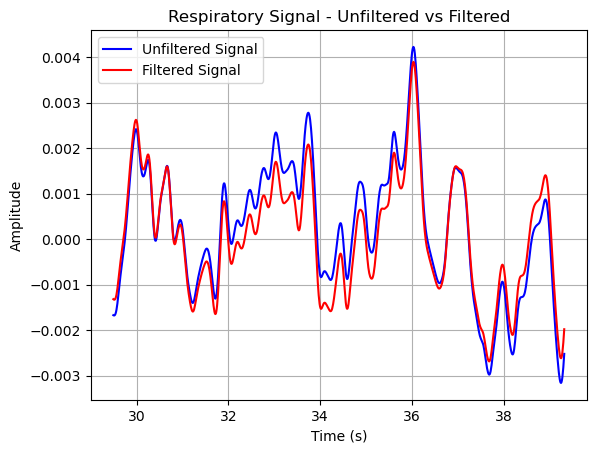

In [298]:
# For calculating respiratory rate in Hz (not BPM), you can use a different method, such as:
# In this case, let's assume you want the peak frequency, using the Fast Fourier Transform (FFT)
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Calculate the frequency spectrum using FFT
def calculate_respiratory_rate(signal, sampling_rate):
    # Perform the FFT on the signal
    N = len(signal)
    fft_signal = fft(signal)
    freqs = fftfreq(N, 1/sampling_rate)
    
    # Only keep the positive frequencies (real frequencies)
    positive_freqs = freqs[:N // 2]
    fft_signal = fft_signal[:N // 2]
    
    # Find the frequency with the largest amplitude
    peak_freq = positive_freqs[np.argmax(np.abs(fft_signal))]
    
    return peak_freq  # Return in Hz

# Calculate the respiratory rate in Hz
rsp_rate_hz = calculate_respiratory_rate(rsp_cleaned_filter, srate)
print(f"Respiratory rate (Hz): {rsp_rate_hz}")

# Plot the signals
plt.plot(time_array[3000:4000], rsp_cleaned[3000:4000], label='Unfiltered Signal', color='b')
plt.plot(time_array[3000:4000], rsp_cleaned_filter[3000:4000], label='Filtered Signal', color='r')
plt.title("Respiratory Signal - Unfiltered vs Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


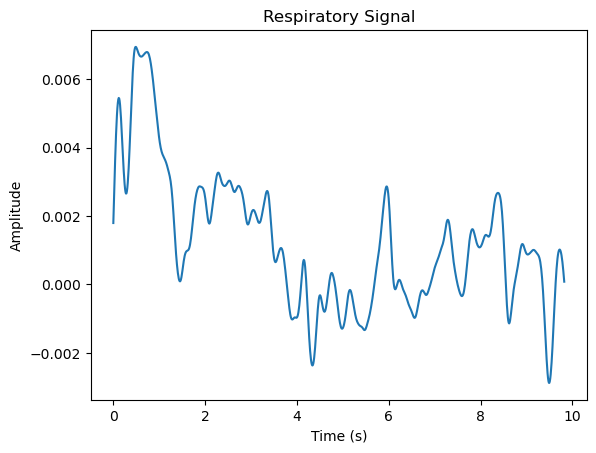

In [299]:
import matplotlib.pyplot as plt

# Plot the signal
plt.plot(time_array[:1000], rsp_cleaned[:1000])
plt.title("Respiratory Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()



In [261]:

# Function to extract behavioral bouts 
def get_behavior_bouts(boris_df, subject, behavior, min_iti=0, min_bout=0):
    bouts = []
    for _, row in boris_df.iterrows():
        if row['Subject'] in subject and row['Behavior'] in behavior:
            bouts.append((row['Start (s)'], row['Stop (s)']))
    # Apply min_iti and min_bout filtering
    bouts = [
        bout for bout in bouts if (bout[1] - bout[0] >= min_bout)
    ]
    return bouts

# Example behavioral bouts (replace with real data) made this up to demo code need to score my boris videos
boris_df = pd.DataFrame({
    "Subject": ["1.1", "1.1", "1.1"],
    "Behavior": ["facial sniffing", "Chasing", "fighting"],
    "Start (s)": [10, 50, 100],
    "Stop (s)": [30, 70, 120]
})
subject = ["1.1"]
behavior = ["facial sniffing"]
behavior_bouts = get_behavior_bouts(boris_df, subject, behavior)


# Add a column to flag respiratory data during behavioral bouts
# This column will indicate if each time point in the respiratory data occurs within a behavioral bout.
# Apply a lambda function to each time point in the 'time_s' column
respiratory_df['in_behavior'] = respiratory_df['time_s'].apply(
    # The lambda function checks if the time point 't' falls within any bout in 'behavior_bouts'
    lambda t: any(
        # 'start' and 'stop' are the start and end times of a behavioral bout
        start <= t <= stop for start, stop in behavior_bouts
    )
)

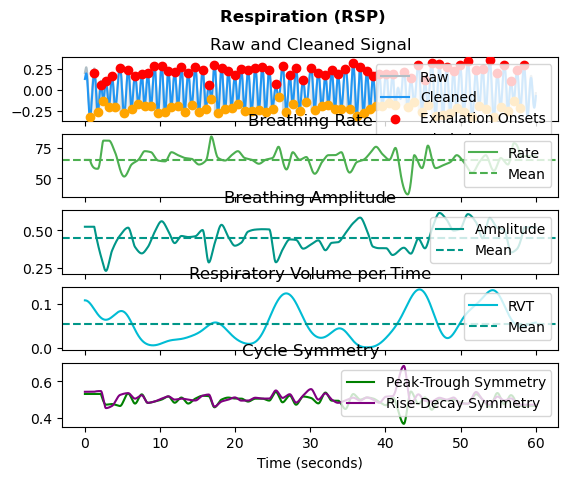

In [260]:
# Generate one minute of respiratory (RSP) signal (recorded at 101 samples / second)
test_rsp = nk.rsp_simulate(duration=60, sampling_rate=101, respiratory_rate=66)

# Process it
signals, info = nk.rsp_process(test_rsp, sampling_rate=101)

# Visualise the processing
nk.rsp_plot(signals, info)